In [1]:
#load pandas and numpy modules
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#read raw data
df = pd.read_csv('dataset.csv')

if df.isnull().values.any():
    print ('missing values!')
    #raise ValueError
else:
    print('pass')

df.head()

pass


,MolID,wt_A1,pore/wt_A1,D3/wt_A1,D3-pore/wt_A1,target_permeator,BalabanJ,BertzCT,Chi0,Chi1,...,PMI3,RadiusOfGyration,SpherocityIndex,avg_asphericity,avg_acylindricity,avg_kappa2,avg_rg,avg_largest_principal_rg,avg_middle_principal_rg,avg_smallest_principal_rg
0,1500272,0.875560,1.000000,1.834508,1.372092,0,1.429,1053.463,24.526,17.092,...,8960.40,4.71,0.26,0.377154,0.212826,0.287922,0.526401,0.505270,0.457168,0.299362
1,1501007,1.152989,1.061628,1.943367,1.755086,0,1.868,592.306,16.113,10.436,...,5322.33,4.43,0.13,0.310194,0.123611,0.349557,0.411174,0.391925,0.369452,0.216417
2,1501150,2.930928,1.000000,1.297877,1.143172,1,2.143,675.300,17.035,10.863,...,4454.32,3.82,0.13,0.307322,0.156884,0.302154,0.421545,0.403439,0.370261,0.235260
3,1503100,10.334869,1.000000,1.193855,1.049448,1,1.453,912.788,20.096,13.507,...,6975.32,4.50,0.21,0.402013,0.129149,0.435131,0.498724,0.478465,0.459285,0.236546
4,1503243,8.064048,1.000000,1.522722,1.344302,0,1.847,673.567,17.527,11.469,...,6455.60,4.67,0.11,0.365638,0.124397,0.441792,0.454138,0.437384,0.416621,0.212002


## Tuned hyper parameters


### 30 Given features
"Features after clustering"


In [2]:
### wt_A1 ###
#RF_tuned_params = {'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 640}
#Best score: 0.5904411764705882
### pore/wt_A1 ###
#RF_tuned_params = {'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 80}
#Best score: 0.5544117647058824
### D3/wt_A1 ###
#RF_tuned_params = {'clf__max_depth': 10, 'clf__min_samples_leaf': 8, 'clf__n_estimators': 1280}
#Best score: 0.6860294117647059
### D3-pore/wt_A1 ###
#RF_tuned_params = {'clf__max_depth': 5, 'clf__min_samples_leaf': 4, 'clf__n_estimators': 80}
#Best score: 0.7602941176470589
### target_permeator ###
#RF_tuned_params = {'clf__max_depth': 5, 'clf__min_samples_leaf': 2, 'clf__n_estimators': 320}
#Best score: 0.7007352941176471
# RF_tuned_params_list = [{'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 640},
# {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 80},
# {'max_depth': 10, 'min_samples_leaf': 8, 'n_estimators': 1280},
# {'max_depth': 5, 'min_samples_leaf': 4, 'n_estimators': 80},
# {'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 320}]

### wt_A1 ###
### wt_A1 ###
#positive/negative: 21/62
#RF_tuned_params = {'clf__max_depth': None, 'clf__max_features': 'log2', 'clf__min_samples_leaf': 2, 'clf__n_estimators': 160}
#Best score: 0.5904411764705882
### D3-pore/wt_A1 ###
#positive/negative: 51/32
#RF_tuned_params = {'clf__max_depth': 10, 'clf__max_features': 'log2', 'clf__min_samples_leaf': 8, 'clf__n_estimators': 640}
#Best score: 0.7727941176470587
### target_permeator ###
#positive/negative: 20/63
#RF_tuned_params = {'clf__max_depth': None, 'clf__max_features': 'log2', 'clf__min_samples_leaf': 1, 'clf__n_estimators': 160}
#Best score: 0.6992647058823529

### 21 features
"Features selected for classification"

In [3]:
### wt_A1 ###
#RF_tuned_params = {'clf__max_depth': 10, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 80}
#Best score: 0.6022058823529413
### pore/wt_A1 ###
#RF_tuned_params = {'clf__max_depth': None, 'clf__min_samples_leaf': 8, 'clf__n_estimators': 160}
#Best score: 0.8308823529411764
### D3/wt_A1 ###
#RF_tuned_params = {'clf__max_depth': 10, 'clf__min_samples_leaf': 2, 'clf__n_estimators': 640}
#Best score: 0.5669117647058824
### D3-pore/wt_A1 ###
#RF_tuned_params = {'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__n_estimators': 80}
#Best score: 0.7125
### target_permeator ###
#RF_tuned_params = {'clf__max_depth': 10, 'clf__min_samples_leaf': 8, 'clf__n_estimators': 640}
#Best score: 0.7

## functions

In [2]:
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_validate, LeaveOneOut, cross_val_score, cross_val_predict
from sklearn.metrics import recall_score,accuracy_score,confusion_matrix, f1_score, precision_score, auc,roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN, KMeansSMOTE
from sklearn.cluster import KMeans
from imblearn.pipeline import Pipeline
#from imblearn.pipeline import Pipeline

#K-fold validation function will take six arguments: 
#1. model, 2. train set, 3.test set, 4.# of fold, 5.shuffle boolean, 6.random_state.
def kf_cv(clf, X, y, sampler, FigureTitel=None, folds=5, shuf=True, random_state=0):
    cv = StratifiedKFold(n_splits=folds, random_state=random_state, shuffle=shuf)
    f1,prec,recall,acc,ROC_AUC,conf = ([],[],[],[],[],[])
    metric_cols=['F1','precision','recall','accuracy','ROC_AUC','confusion_matrix']

    i = 0
    for train_index, val_index in cv.split(X, y):
        #turn on the below code will print train_index/test_index and may help understand the details and debug.
        #print("Train Index: ", type(train_index), "\n")
        #print("Test Index: ", test_index)
        
        # for np.array:
        #X_train, X_val, y_train, y_val = X[train_index], X[val_index], y[train_index], y[val_index]
        # for pandas seires:
        X_train, X_val, y_train, y_val = X.iloc[train_index], X.iloc[val_index], y[train_index], y[val_index]

        #if sampling method is used, use this to avoid warnings: clf.fit(X_train.values, y_train.values.ravel())
        X_resampled, Y_resampled = sampler.fit_resample(X_train, y_train)
        clf.fit(X_resampled, Y_resampled)
        
        pred_val = clf.predict(X_val)
        pred_val_probs = clf.predict_proba(X_val)
        #print(pred_test_probs)
        fpr, tpr, _ = roc_curve(y_val,pred_val_probs[:,1]) # use pred_test_probs instead of pred_test
        
        f1.append(f1_score(y_val,pred_val))
        prec.append(precision_score(y_val,pred_val))
        recall.append(recall_score(y_val,pred_val))
        acc.append(accuracy_score(y_val,pred_val))
        ROC_AUC.append(roc_auc_score(y_val, pred_val_probs[:,1]))
        conf.append(confusion_matrix(y_val,pred_val))

        plt.plot(fpr, tpr, label=str(i))
        i += 1 # plot ROC curve
    
    plt.axline([0, 0], [1, 1], linewidth=1, color='k', linestyle='--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.legend()
    plt.title(FigureTitel)
    plt.show()
    #return a dataframe consisting five metrics and confusion matrix.
    return pd.DataFrame(zip(f1,prec,recall,acc,ROC_AUC,conf), columns = metric_cols)

def loocv(clf, X, y, sampler, random_state=0):
    # create loocv procedure
    cv = LeaveOneOut()
    metric_cols=['F1','precision','recall','accuracy','confusion_matrix']
    model = Pipeline([('scaler', StandardScaler()), ('over-sampling', sampler), ('clf', clf)])
    # evaluate model
    f1 = round(f1_score(y,Y_pred),3)
    prec = round(precision_score(y,Y_pred),3)
    recall = round(recall_score(y,Y_pred),3)
    acc = round(accuracy_score(y,Y_pred),3)
    conf = confusion_matrix(y,Y_pred).tolist()
    # report performance
    return pd.DataFrame([[f1,prec,recall,acc,conf]], columns = metric_cols)

## Cross-validation, test, and ROC curve

In [19]:
def validation(Ycolumns, RF_tuned_params_list, descriptors, sampler):
    feature_importance = {}
    feature_importance["Features"] = descriptors
    for column, RF_tuned_params in zip(Ycolumns, RF_tuned_params_list): # use different Y in every iteration
        print(f"### {column} ###")
        ### specify X and Y ###
        df_no_nan = df.dropna(subset=[column]) # drop row if NaN in Y
        Y = df_no_nan[column]

        if column in ["target_permeator"]:
            Yb = Y
        else:
            if column in ["D3-pore/wt_A1", "D3/wt_A1", "pore/wt_A1"]:
                threshold = 1.2 # slope ratios
            else:
                threshold = np.quantile(Y, 0.75) # amplitude and slope
            Yb = (Y > threshold).astype(int) # threshold slope ratios
        X_raw = df.iloc[:,6:]

        ### scale X ###
        scaler = StandardScaler()
        X_scaled = pd.DataFrame(scaler.fit_transform(X_raw), columns=X_raw.columns)
        X_given = X_scaled[descriptors]
        
        if column in ["target_permeator"]:
            Yb = Y.to_numpy()
        else:
            if column in ["D3-pore/wt_A1", "D3/wt_A1", "pore/wt_A1"]:
                threshold = 1.2 # slope ratios
            else:
                threshold = np.quantile(Y, 0.75) # amplitude and slope
            Yb = (Y > threshold).astype(int) # threshold slope ratios
        
        print(f"positive/negative: {sum(Yb)}/{len(Yb)-sum(Yb)}")

        ### Cross-Validation ###
        RF = RandomForestClassifier(random_state=0, n_jobs=-1).set_params(**RF_tuned_params)

        # # check mean performance of each model.
        print("----- 5-fold Cross Validation -----")
        cv_score_mean = cv_score_mean.transpose().astype(float).round(2)
        print(cv_score_mean)
        print(kf_cv(RF, X_given, Yb, sampler, FigureTitel=column, folds=5, shuf=True))
        print("----- Leave-one-out -----")
        print(loocv(RF,X_given,Yb, sampler))
        ### feature importance ###
        #feature_importance[column] = RF.feature_importances_
    return pd.DataFrame(feature_importance)

### target_permeator ###
positive/negative: 20/63
----- 5-fold Cross Validation -----
D:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment vari

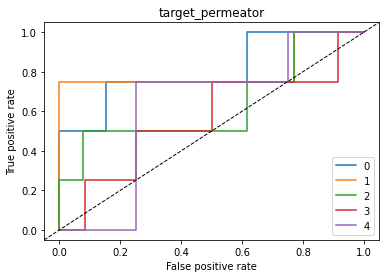

         F1  precision  recall  accuracy   ROC_AUC   confusion_matrix
0  0.666667   1.000000    0.50  0.882353  0.807692  [[13, 0], [2, 2]]
1  0.666667   1.000000    0.50  0.882353  0.807692  [[13, 0], [2, 2]]
2  0.400000   0.333333    0.50  0.647059  0.634615   [[9, 4], [2, 2]]
3  0.333333   0.500000    0.25  0.750000  0.562500  [[11, 1], [3, 1]]
4  0.000000   0.000000    0.00  0.625000  0.625000  [[10, 2], [4, 0]]
----- Leave-one-out -----
      F1  precision  recall  accuracy    confusion_matrix
0  0.387      0.545     0.3     0.771  [[58, 5], [14, 6]]


In [20]:
## test different re-sampling method
RF_tuned_params_list = [{'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 400}]
#sampler = KMeansSMOTE(kmeans_estimator=KMeans(9), n_jobs=-1, random_state=0)
sampler = KMeansSMOTE(kmeans_estimator=9, k_neighbors=2, cluster_balance_threshold=0.2)
Ycolumns = ['target_permeator']
descriptors = ['PMI1','avg_smallest_principal_rg','NumHDonors','TPSA','avg_kappa2','avg_rg','Kappa3','NumRotatableBonds','HallKierAlpha','FpDensityMorgan2','NumHAcceptors','NumHeteroatoms','LabuteASA','NumAromaticCarbocycles','NumAromaticRings','NPR2','EState_VSA2','MaxAbsEStateIndex','NumAliphaticHeterocycles','FractionCSP3','NumAliphaticCarbocycles','MinAbsEStateIndex','MinPartialCharge','NumAromaticHeterocycles','NPR1','MaxAbsPartialCharge','MinEStateIndex','avg_acylindricity','MinAbsPartialCharge','MolLogP'] # Features after clustering

feature_importance = validation(Ycolumns, RF_tuned_params_list, descriptors, sampler)

### wt_A1 ###
positive/negative: 21/62


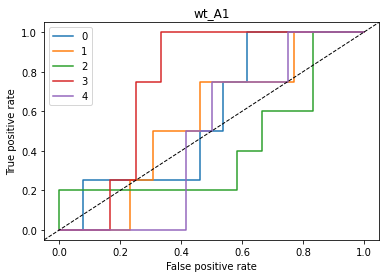

----- 5-fold Cross Validation -----
      F1  precision  recall  accuracy  ROC_AUC
RF  0.14       0.15    0.14      0.63     0.56
     F1  precision  recall  accuracy   ROC_AUC   confusion_matrix
0  0.20   0.166667    0.25  0.529412  0.576923   [[8, 5], [3, 1]]
1  0.00   0.000000    0.00  0.705882  0.557692  [[12, 1], [4, 0]]
2  0.25   0.333333    0.20  0.647059  0.416667  [[10, 2], [4, 1]]
3  0.25   0.250000    0.25  0.625000  0.750000   [[9, 3], [3, 1]]
4  0.00   0.000000    0.00  0.625000  0.479167  [[10, 2], [4, 0]]
----- Leave-one-out -----
     F1  precision    recall  accuracy     confusion_matrix
0  0.25   0.263158  0.238095  0.638554  [[48, 14], [16, 5]]
### D3-pore/wt_A1 ###
positive/negative: 51/32


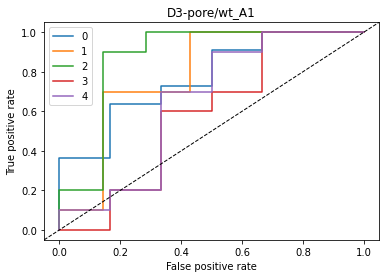

----- 5-fold Cross Validation -----
      F1  precision  recall  accuracy  ROC_AUC
RF  0.77       0.74     0.8      0.71     0.73
         F1  precision    recall  accuracy   ROC_AUC   confusion_matrix
0  0.782609   0.750000  0.818182  0.705882  0.772727   [[3, 3], [2, 9]]
1  0.818182   0.750000  0.900000  0.764706  0.785714   [[4, 3], [1, 9]]
2  0.869565   0.769231  1.000000  0.823529  0.871429  [[4, 3], [0, 10]]
3  0.631579   0.666667  0.600000  0.562500  0.583333   [[3, 3], [4, 6]]
4  0.736842   0.777778  0.700000  0.687500  0.650000   [[4, 2], [3, 7]]
----- Leave-one-out -----
         F1  precision    recall  accuracy      confusion_matrix
0  0.769231   0.754717  0.784314  0.710843  [[19, 13], [11, 40]]
### target_permeator ###
positive/negative: 20/63


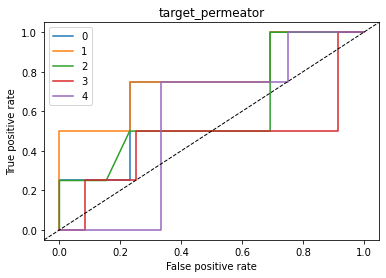

----- 5-fold Cross Validation -----
      F1  precision  recall  accuracy  ROC_AUC
RF  0.28       0.37    0.25      0.71     0.62
         F1  precision  recall  accuracy   ROC_AUC   confusion_matrix
0  0.333333   0.500000    0.25  0.764706  0.711538  [[12, 1], [3, 1]]
1  0.666667   1.000000    0.50  0.882353  0.769231  [[13, 0], [2, 2]]
2  0.400000   0.333333    0.50  0.647059  0.605769   [[9, 4], [2, 2]]
3  0.000000   0.000000    0.00  0.687500  0.458333  [[11, 1], [4, 0]]
4  0.000000   0.000000    0.00  0.562500  0.562500   [[9, 3], [4, 0]]
----- Leave-one-out -----
         F1  precision  recall  accuracy     confusion_matrix
0  0.333333      0.375     0.3  0.710843  [[53, 10], [14, 6]]


In [6]:
RF_tuned_params_list = [{'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'n_estimators': 160},
{'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 8, 'n_estimators': 640},
{'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 160}]

Ycolumns = ['wt_A1', 'D3-pore/wt_A1', 'target_permeator']
descriptors = ['PMI1','avg_smallest_principal_rg','NumHDonors','TPSA','avg_kappa2','avg_rg','Kappa3','NumRotatableBonds','HallKierAlpha','FpDensityMorgan2','NumHAcceptors','NumHeteroatoms','LabuteASA','NumAromaticCarbocycles','NumAromaticRings','NPR2','EState_VSA2','MaxAbsEStateIndex','NumAliphaticHeterocycles','FractionCSP3','NumAliphaticCarbocycles','MinAbsEStateIndex','MinPartialCharge','NumAromaticHeterocycles','NPR1','MaxAbsPartialCharge','MinEStateIndex','avg_acylindricity','MinAbsPartialCharge','MolLogP'] # Features after clustering

feature_importance = validation(Ycolumns, RF_tuned_params_list, descriptors)

### wt_A1 ###
positive/negative: 21/62
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


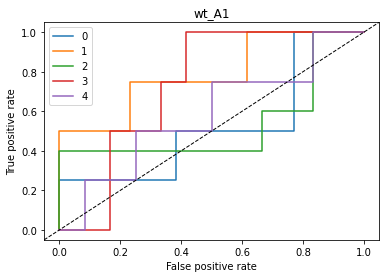

----- 5-fold Cross Validation -----
      F1  precision  recall  accuracy  ROC_AUC
RF  0.19       0.22    0.18      0.66     0.63
     F1  precision  recall  accuracy   ROC_AUC   confusion_matrix
0  0.20   0.166667    0.25  0.529412  0.519231   [[8, 5], [3, 1]]
1  0.00   0.000000    0.00  0.764706  0.788462  [[13, 0], [4, 0]]
2  0.50   0.666667    0.40  0.764706  0.533333  [[11, 1], [3, 2]]
3  0.00   0.000000    0.00  0.625000  0.729167  [[10, 2], [4, 0]]
4  0.25   0.250000    0.25  0.625000  0.583333   [[9, 3], [3, 1]]
----- Leave-one-out -----
         F1  precision    recall  accuracy     confusion_matrix
0  0.315789   0.352941  0.285714  0.686747  [[51, 11], [15, 6]]
### D3-pore/wt_A1 ###
positive/negative: 51/32


KeyboardInterrupt: 

In [7]:
RF_tuned_params_list = [{'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'n_estimators': 160},
{'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 8, 'n_estimators': 640},
{'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 160}]

Ycolumns = ['wt_A1', 'D3-pore/wt_A1', 'target_permeator']
descriptors = ['LabuteASA', 'NPR2', 'BalabanJ', 'MaxAbsEStateIndex', 'PMI3', 'MaxPartialCharge', 'MinEStateIndex', 'EState_VSA11', 'FractionCSP3', 'EState_VSA1', 'FpDensityMorgan2', 'avg_largest_principal_rg', 'avg_acylindricity', 'NPR1', 'NumAromaticHeterocycles', 'MinAbsEStateIndex', 'Kappa2', 'NumAliphaticHeterocycles', 'Chi3n', 'NumHAcceptors', 'EState_VSA3', 'NumHeteroatoms', 'NumHDonors', 'HallKierAlpha', 'NumAromaticCarbocycles', 'EState_VSA5', 'NumRotatableBonds', 'PMI1', 'EState_VSA7', 'EState_VSA2', 'EState_VSA9'] # old

feature_importance = validation(Ycolumns, RF_tuned_params_list, descriptors)

### wt_A1 ###
positive/negative: 21/62


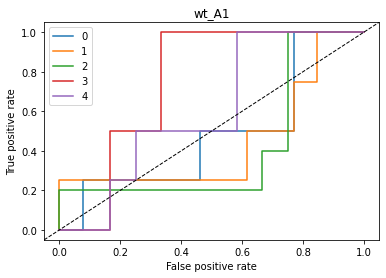

----- 5-fold Cross Validation -----
      F1  precision  recall  accuracy  ROC_AUC
RF  0.15       0.18    0.14      0.64     0.54
         F1  precision  recall  accuracy   ROC_AUC   confusion_matrix
0  0.333333   0.500000    0.25  0.764706  0.480769  [[12, 1], [3, 1]]
1  0.250000   0.250000    0.25  0.647059  0.442308  [[10, 3], [3, 1]]
2  0.181818   0.166667    0.20  0.470588  0.416667   [[7, 5], [4, 1]]
3  0.000000   0.000000    0.00  0.687500  0.750000  [[11, 1], [4, 0]]
4  0.000000   0.000000    0.00  0.625000  0.604167  [[10, 2], [4, 0]]
----- Leave-one-out -----
    F1  precision    recall  accuracy     confusion_matrix
0  0.3   0.315789  0.285714  0.662651  [[49, 13], [15, 6]]
### D3-pore/wt_A1 ###
positive/negative: 51/32


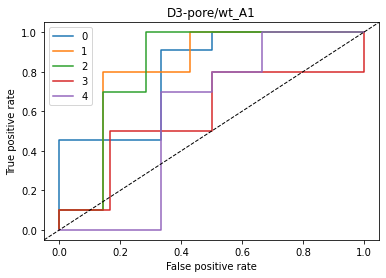

----- 5-fold Cross Validation -----
      F1  precision  recall  accuracy  ROC_AUC
RF  0.74       0.77    0.75       0.7     0.72
         F1  precision    recall  accuracy   ROC_AUC   confusion_matrix
0  0.588235   0.833333  0.454545  0.588235  0.803030   [[5, 1], [6, 5]]
1  0.800000   0.800000  0.800000  0.764706  0.814286   [[5, 2], [2, 8]]
2  0.909091   0.833333  1.000000  0.882353  0.828571  [[5, 2], [0, 10]]
3  0.631579   0.666667  0.600000  0.562500  0.583333   [[3, 3], [4, 6]]
4  0.782609   0.692308  0.900000  0.687500  0.583333   [[2, 4], [1, 9]]
----- Leave-one-out -----
     F1  precision   recall  accuracy      confusion_matrix
0  0.74   0.755102  0.72549  0.686747  [[20, 12], [14, 37]]
### target_permeator ###
positive/negative: 20/63


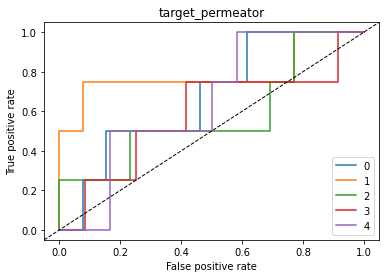

----- 5-fold Cross Validation -----
      F1  precision  recall  accuracy  ROC_AUC
RF  0.33       0.33    0.35      0.69     0.65
         F1  precision  recall  accuracy   ROC_AUC   confusion_matrix
0  0.444444   0.400000    0.50  0.705882  0.673077  [[10, 3], [2, 2]]
1  0.571429   0.666667    0.50  0.823529  0.788462  [[12, 1], [2, 2]]
2  0.333333   0.250000    0.50  0.529412  0.576923   [[7, 6], [2, 2]]
3  0.000000   0.000000    0.00  0.687500  0.583333  [[11, 1], [4, 0]]
4  0.285714   0.333333    0.25  0.687500  0.645833  [[10, 2], [3, 1]]
----- Leave-one-out -----
        F1  precision  recall  accuracy      confusion_matrix
0  0.47619   0.454545     0.5   0.73494  [[51, 12], [10, 10]]


In [16]:
RF_tuned_params_list = [{'max_depth': 5, 'max_features': None, 'min_samples_leaf': 8, 'n_estimators': 640},
{'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'n_estimators': 320},
{'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 8, 'n_estimators': 320}]

### wt_A1 ###
#positive/negative: 21/62
#RF_tuned_params = {'clf__max_depth': 5, 'clf__max_features': None, 'clf__min_samples_leaf': 8, 'clf__n_estimators': 640}
#Best score: 0.4378205128205129
### D3-pore/wt_A1 ###
#positive/negative: 51/32
#RF_tuned_params = {'clf__max_depth': 10, 'clf__max_features': None, 'clf__min_samples_leaf': 2, 'clf__n_estimators': 320}
#Best score: 0.7856277056277057
### target_permeator ###
#positive/negative: 20/63
#RF_tuned_params = {'clf__max_depth': 5, 'clf__max_features': 'log2', 'clf__min_samples_leaf': 8, 'clf__n_estimators': 320}
#Best score: 0.6352564102564102

Ycolumns = ['wt_A1', 'D3-pore/wt_A1', 'target_permeator']
descriptors = ['LabuteASA', 'NPR2', 'BalabanJ', 'MaxAbsEStateIndex', 'PMI3', 'MaxPartialCharge', 'MinEStateIndex', 'EState_VSA11', 'FractionCSP3', 'EState_VSA1', 'FpDensityMorgan2', 'avg_largest_principal_rg', 'avg_acylindricity', 'NPR1', 'NumAromaticHeterocycles', 'MinAbsEStateIndex', 'Kappa2', 'NumAliphaticHeterocycles', 'Chi3n', 'NumHAcceptors', 'EState_VSA3', 'NumHeteroatoms', 'NumHDonors', 'HallKierAlpha', 'NumAromaticCarbocycles', 'EState_VSA5', 'NumRotatableBonds', 'PMI1', 'EState_VSA7', 'EState_VSA2', 'EState_VSA9'] # old

feature_importance = validation(Ycolumns, RF_tuned_params_list, descriptors)

## Probability density plot

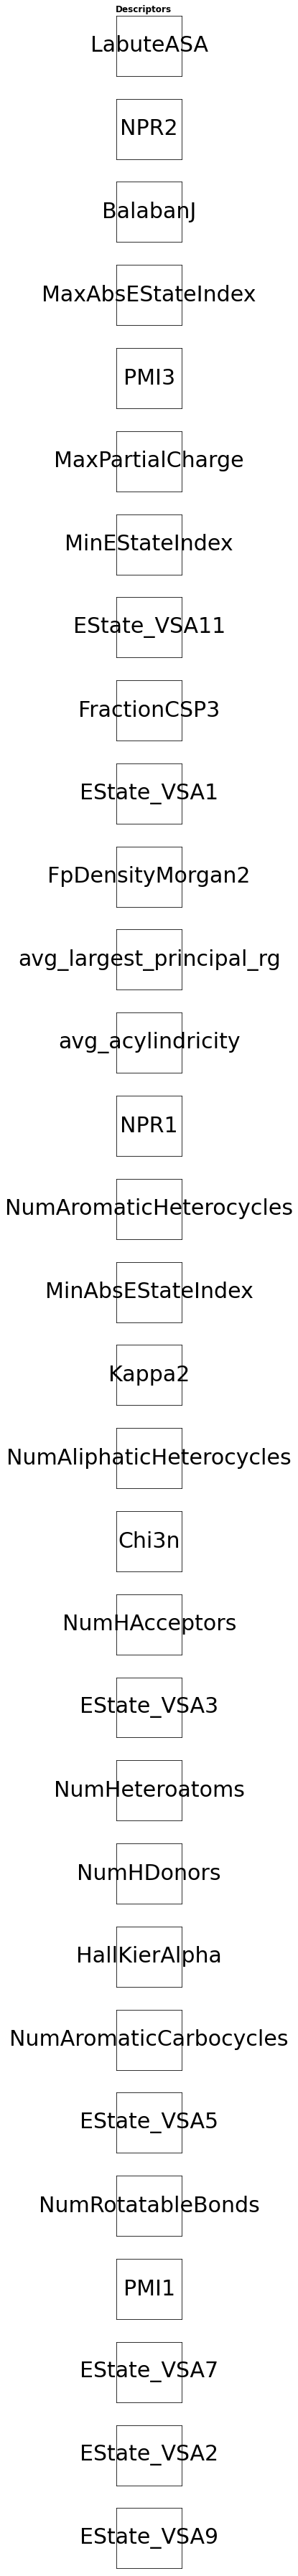

'\nfor column in Ycolumns: # use different Y in every iteration\n    print(column)\n    #matrix figure\n    fig, axs = plt.subplots(nrows=31, ncols=1, figsize=(2,50))\n    plt.tight_layout()\n    ### specify X and Y ###\n    df_no_nan = df.dropna(subset=[column]) # drop row if NaN in Y\n    Y = df_no_nan[column]\n    \n    if column in ["A2_pore/wt", "A2_pd3/wt", "A2_pd3-pore/wt"]:\n        threshold = 1.2 # slope ratios\n    else:\n        threshold = np.quantile(Y, 0.75) # amplitude and slope\n    \n    Yb = (Y > threshold).astype(int)\n\n    X_raw = df_no_nan.iloc[:,12:]\n    X_given = X_raw[descriptors]\n\n    # split high and low\n    X_high = X_given[Yb==1]\n    X_low = X_given[Yb==0]\n\n    for feature, ax in zip(descriptors, axs.ravel()):\n        #print(feature)\n        xx = np.linspace(X_given[feature].min(), X_given[feature].max(), 100)\n        #print(X_high[feature].shape)\n        try:\n            kernel_high = stats.gaussian_kde(X_high[feature])\n            ax.plot(xx

In [44]:
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

Ycolumns = ["wt_A2_slope", "pore_A2_slope", "pd3_A2_slope", "pd3pore_A2_slope", "A2_pore/wt", "A2_pd3/wt", "A2_pd3-pore/wt", "A2_10", "A2_20", "A2_40", "A2_80"]
descriptors = ['LabuteASA', 'NPR2', 'BalabanJ', 'MaxAbsEStateIndex', 'PMI3', 'MaxPartialCharge', 'MinEStateIndex', 'EState_VSA11', 'FractionCSP3', 'EState_VSA1', 'FpDensityMorgan2', 'avg_largest_principal_rg', 'avg_acylindricity', 'NPR1', 'NumAromaticHeterocycles', 'MinAbsEStateIndex', 'Kappa2', 'NumAliphaticHeterocycles', 'Chi3n', 'NumHAcceptors', 'EState_VSA3', 'NumHeteroatoms', 'NumHDonors', 'HallKierAlpha', 'NumAromaticCarbocycles', 'EState_VSA5', 'NumRotatableBonds', 'PMI1', 'EState_VSA7', 'EState_VSA2', 'EState_VSA9']
'''
# a plot of descriptor names
fig, axs = plt.subplots(nrows=31, ncols=1, figsize=(2,50))
plt.tight_layout()
for feature, ax in zip(descriptors, axs.ravel()):
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    #ax.plot([0,0],[0,1], aspect="equal")
    ax.text(0.5, 0.5, feature, size=30, ha='center', va='center', transform=ax.transAxes)

fig.suptitle("Descriptors", y=1, weight="bold")
plt.show()
'''
for column in Ycolumns: # use different Y in every iteration
    print(column)
    #matrix figure
    fig, axs = plt.subplots(nrows=31, ncols=1, figsize=(2,50))
    plt.tight_layout()
    ### specify X and Y ###
    df_no_nan = df.dropna(subset=[column]) # drop row if NaN in Y
    Y = df_no_nan[column]
    
    if column in ["A2_pore/wt", "A2_pd3/wt", "A2_pd3-pore/wt"]:
        threshold = 1.2 # slope ratios
    else:
        threshold = np.quantile(Y, 0.75) # amplitude and slope
    
    Yb = (Y > threshold).astype(int)

    X_raw = df_no_nan.iloc[:,12:]
    X_given = X_raw[descriptors]

    # split high and low
    X_high = X_given[Yb==1]
    X_low = X_given[Yb==0]

    for feature, ax in zip(descriptors, axs.ravel()):
        #print(feature)
        xx = np.linspace(X_given[feature].min(), X_given[feature].max(), 100)
        #print(X_high[feature].shape)
        try:
            kernel_high = stats.gaussian_kde(X_high[feature])
            ax.plot(xx, kernel_high(xx), color="r", label="high")
            ax.fill_between(xx, kernel_high(xx), color='r', alpha=0.5)
        except:
            norm = stats.norm(X_given[feature].mean(), 0.1)
            ax.plot(xx, norm.pdf(xx), color="r", label="high")
            ax.fill_between(xx, norm.pdf(xx), color='r', alpha=0.5)

        kernel_low = stats.gaussian_kde(X_low[feature])
        ax.plot(xx, kernel_low(xx), color="b", label="low")
        ax.fill_between(xx, kernel_low(xx), color='b', alpha=0.5)
        ax.yaxis.set_visible(False)
        #ax.set_title(feature)
        #break

    #plt.legend()
    fig.suptitle(column, y=1, weight="bold")
    plt.show()
    #break